In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix





In [8]:
def plot_type_error(stats, distribution = "Normal", type_error = 1, save=False):
    #for each sample size, calculate the type 1 error rate in stats for each test
    type_error_dict = {
        5: [],
        10: [],
        15: [],
        20: []
    }

    for key in stats.keys():
        for j in range(0, 6):
            count = 0
            for k in range(0, 750):
                if(type_error == 1):

                    if j == 0:
                        if stats[key][j][k] < 0.2:
                            count += 1
                    else:
                        if stats[key][j][k] < 0.05:
                            count += 1
                elif(type_error == 2):
                    if j == 0:
                        if stats[key][j][k] > 0.2:
                            count += 1
                    else:
                        if stats[key][j][k] > 0.05:
                            count += 1   
            type_error_dict[int(key)].append(count/750) 

    #restructure data for line plotting
    type_error_dict = pd.DataFrame(type_error_dict)
    type_error_dict = type_error_dict.transpose()
    type_error_dict.columns = ["ASO", "Student's t", "Bootstrap", "Permutation", "Wilcoxon", "Mann-Whitney U"]
    type_error_dict = type_error_dict.reset_index()
    type_error_dict = type_error_dict.rename(columns = {"index": "Sample Size"})
    type_error_dict = type_error_dict.melt(id_vars = ["Sample Size"], var_name = "Test", value_name = f"Type {type_error} Error Rate")

    #plot type 1 error rate
    import seaborn as sns
    sns.set_theme(style="whitegrid")
    ax = sns.lineplot(x="Sample Size", y=f"Type {type_error} Error Rate", hue="Test", data=type_error_dict)
    ax.set_title(f"Type {type_error} Error Rate from {distribution} Distribution")
    ax.set(xlabel='Sample Size', ylabel=f'Type {type_error} Error Rate')
    if(save):
        plt.savefig(f"type_{type_error}_error_{distribution}.png")
    


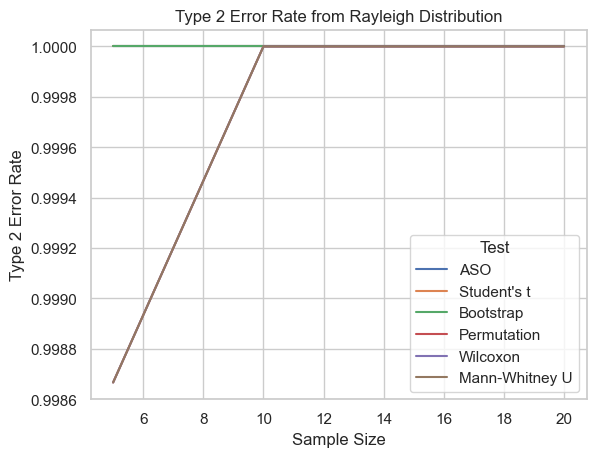

In [20]:
#read in stats_normal.json
import json
with open('stats_rayleigh_2.json') as json_file:
    stats = json.load(json_file)

plot_type_error(stats, distribution = "Rayleigh", type_error = 2, save=True)